In [6]:
!pip install pandas
!pip install numpy
!pip install matplotlib


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
gadded = pd.read_csv("/Users/dom05/Documents/Data Science Projects/Timbers Data Project/Data/american_soccer_analysis_mls_goals-added_players_2025-02-20.csv")
salaries = pd.read_csv("/Users/dom05/Documents/Data Science Projects/Timbers Data Project/Data/american_soccer_analysis_mls_salaries_players_2025-02-20.csv")
xg = pd.read_csv("/Users/dom05/Documents/Data Science Projects/Timbers Data Project/Data/american_soccer_analysis_mls_xgoals_players_2025-02-20.csv")
xpass = pd.read_csv("/Users/dom05/Documents/Data Science Projects/Timbers Data Project/Data/american_soccer_analysis_mls_xpass_players_2025-02-20.csv")
gadded_ptfc25 = pd.read_csv("/Users/dom05/Documents/Data Science Projects/Timbers Data Project/Data/american_soccer_analysis_mls_goals-added_players_2025-07-10.csv")

In [9]:
gadd_salaries = gadded.merge(salaries[['Player','Base Salary','Guaranteed Compensation']],on="Player").drop('Unnamed: 0',axis = 1)

In [10]:
ptfc_df = gadd_salaries[gadd_salaries['Team'] == 'POR']
ptfc_df['Base Salary Number'] = ptfc_df['Base Salary'].str.replace("$", "").str.replace(",", "").astype(int)
ptfc_df.columns

/var/folders/pn/v8c4s2w974s_4jhc608djs7h0000gn/T/ipykernel_98598/3874775441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ptfc_df['Base Salary Number'] = ptfc_df['Base Salary'].str.replace("$", "").str.replace(",", "").astype(int)


Index(['Player', 'Team', 'Season', 'Position', 'Minutes', 'Dribbling',
       'Fouling', 'Interrupting', 'Passing', 'Receiving', 'Shooting',
       'Goals Added', 'Base Salary', 'Guaranteed Compensation',
       'Base Salary Number'],
      dtype='object')

In [11]:
ptfc_df = ptfc_df.sort_values('Base Salary Number',ascending = True)


/var/folders/pn/v8c4s2w974s_4jhc608djs7h0000gn/T/ipykernel_98598/2341280444.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(ptfc_df['Base Salary Number'],ptfc_df['Goals Added'],'ro',color = 'darkgreen')


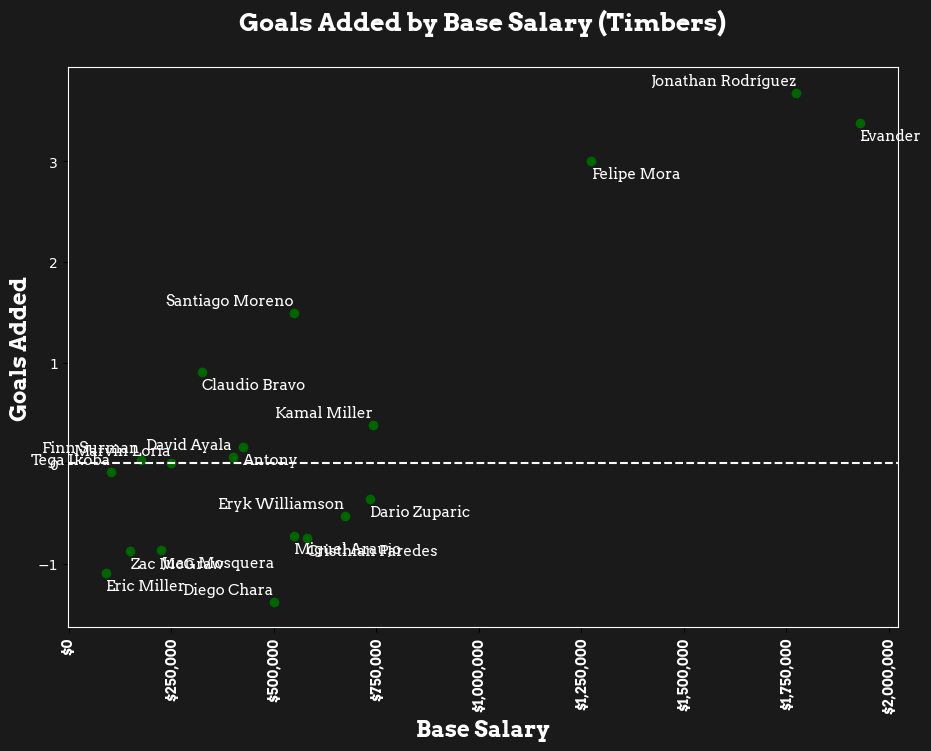

In [12]:
import matplotlib.font_manager as font_manager
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker

# Load font
font_path = 'Fonts/Arvo-Bold.ttf'
font_props = font_manager.FontProperties(fname=font_path)

# Create figure
fig, ax = plt.subplots(figsize=(10, 8))  # Bigger canvas
fig.subplots_adjust(left=0.1, right=0.93, top=0.9, bottom=0.2)  # Adjust margins

# Set background
fig.patch.set_facecolor('#1a1a1a')  
ax.set_facecolor('#1a1a1a')


plt.plot(ptfc_df['Base Salary Number'],ptfc_df['Goals Added'],'ro',color = 'darkgreen')

# Add labels for each point
# Add labels for each point with slight offset
for i in range(len(ptfc_df)):
    plt.text(
        ptfc_df.iloc[i]['Base Salary Number'] + (0.05 if i % 2 == 1 else -0.05), 
        ptfc_df.iloc[i]['Goals Added'] + (0.05 if i % 2 == 1 else -0.05),   # Offset y by 0.05
        ptfc_df.iloc[i]['Player'],
        fontsize=11,
        ha='right' if i % 2 == 1 else 'left',
        va='bottom' if i % 2 == 1 else 'top',
        fontproperties = font_manager.FontProperties(fname='Fonts/Arvo-Regular.ttf'),
        color = 'white'
    )

plt.axhline(y=0, color='white', linestyle='--', linewidth=1.5)

# Formatting
plt.xlabel('Base Salary', color='white', fontproperties=font_props,size = 16)
plt.ylabel('Goals Added', color='white', fontproperties=font_props,size = 16)
plt.xticks(rotation=90, color='white',fontproperties = font_props)
# Format the x-axis to display full numbers (instead of scientific notation)
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"${x:,.0f}"))  # Format as currency with commas

plt.yticks(color='white')

plt.title('Goals Added by Base Salary (Timbers)\n',color = 'white',
          fontproperties = font_props,size = 18)

# Change axis colors to white
ax.spines['bottom'].set_color('white')  # Bottom border
ax.spines['top'].set_color('white')     # Top border
ax.spines['right'].set_color('white')   # Right border
ax.spines['left'].set_color('white')    # Left border



plt.savefig('timbers_salary_gadd.png',dpi = 700)


In [42]:
mapping = {'CB':0,'FB':1,'DM':2,'CM':2,'AM':3,'W':4,'ST':5}

gadded_ptfc25 = pd.read_csv("Data/american_soccer_analysis_mls_goals-added_players_2025-07-10.csv")
gadded_ptfc25 = gadded_ptfc25[(gadded_ptfc25['Team'] == 'POR') | (gadded_ptfc25['Team'] == 'POR, COL')]
print(gadded_ptfc25["Player"].unique())


# ptfc_df['Defensive Actions'] = ((ptfc_df['Interrupting'] + ptfc_df['Fouling'])/ ptfc_df['Minutes']) * 90
# ptfc_df['PositionCode'] = ptfc_df['Position'].map(mapping)
# ptfc_df = ptfc_df.sort_values("PositionCode")
# ptfc_df = ptfc_df[ptfc_df['Minutes'] > 200]

ptfc_2025_df = gadded_ptfc25
ptfc_2025_df.loc[ptfc_2025_df['Player'] == 'David Pereira Da Costa','Position'] = 'AM'
ptfc_2025_df.loc[ptfc_2025_df['Player'] == 'Omir Fernández','Position'] = 'AM'
ptfc_2025_df.loc[ptfc_2025_df['Player'] == 'Ian Smith','Position'] = 'FB'
ptfc_2025_df['Defensive Actions'] = ((ptfc_2025_df['Interrupting'] + ptfc_2025_df['Fouling'])/ ptfc_2025_df['Minutes']) * 90
ptfc_2025_df['PositionCode'] = ptfc_2025_df['Position'].map(mapping)
ptfc_2025_df = ptfc_2025_df[ptfc_2025_df['Minutes'] >= 90]
ptfc_2025_df = ptfc_2025_df.sort_values("PositionCode")

x_labels = ['CB','FB','CM','AM','W','ST']
print(ptfc_2025_df["Position"].unique())

['David Ayala' 'Jonathan Rodríguez' 'Claudio Bravo' 'Gage Guerra'
 'Omir Fernández' 'Santiago Moreno' 'David Pereira Da Costa'
 'Juan Mosquera' 'Ian Smith' 'Dario Zuparic' 'Kamal Miller'
 'Ariel Lassiter' 'Finn Surman' 'Cristhian Paredes' 'Eric Miller'
 'Jimer Fory' 'Felipe Mora' 'Zac McGraw' 'Diego Chará' 'Joao Ortíz'
 'Antony' 'Kevin Kelsy']
['CB' 'FB' 'DM' 'AM' 'W' 'ST']


/var/folders/pn/v8c4s2w974s_4jhc608djs7h0000gn/T/ipykernel_98598/2450276258.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(ptfc_2025_df["PositionCode"],ptfc_2025_df['Goals Added'],'ro',color='gold')


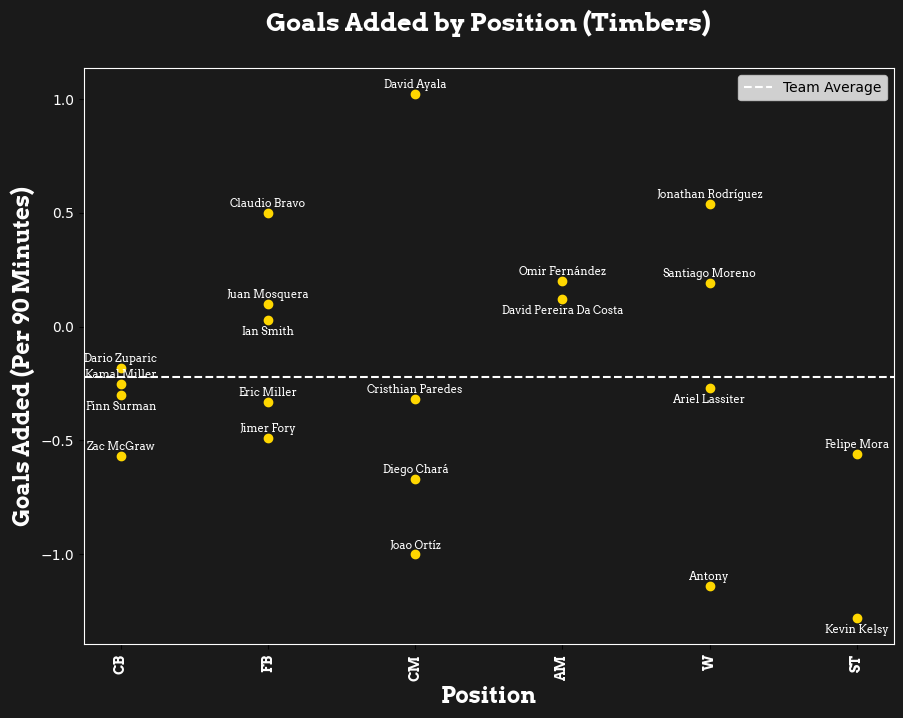

In [46]:
import matplotlib.font_manager as font_manager
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker

# Load font
font_path = 'Fonts/Arvo-Bold.ttf'
font_props = font_manager.FontProperties(fname=font_path)

# Create figure
fig, ax = plt.subplots(figsize=(10, 8))  # Bigger canvas
fig.subplots_adjust(left=0.12, right=0.93, top=0.87, bottom=0.15)  # Adjust margins

# Set background
fig.patch.set_facecolor('#1a1a1a')  
ax.set_facecolor('#1a1a1a')

# This season per 90
plt.plot(ptfc_2025_df["PositionCode"],ptfc_2025_df['Goals Added'],'ro',color='gold')


# Add labels for each point
# Add labels for each point with slight offset

for i in range(len(ptfc_2025_df)):
    name = ptfc_2025_df.iloc[i]['Player']
    other_players = name in ['Kevin Kelsy','Finn Surman','Ariel Lassiter','David Pereira Da Costa', 'Ian Smith']
    plt.text(
        ptfc_2025_df.iloc[i]['PositionCode'], 
        ptfc_2025_df.iloc[i]['Goals Added'] + (0.014 if not other_players else -0.025),   # Offset y by 0.05
        ptfc_2025_df.iloc[i]['Player'],
        fontsize=8,
        ha='center',
        va='bottom' if not other_players else 'top',
        fontproperties = font_manager.FontProperties(fname='Fonts/Arvo-Regular.ttf'),
        color = 'white'
    )

avg_g_added = ptfc_2025_df['Goals Added'].mean()
plt.axhline(y=avg_g_added, color='white', label = 'Team Average', linestyle='--', linewidth=1.5)

# Formatting
plt.xlabel('Position', color='white', fontproperties=font_props,size = 16)
plt.ylabel('Goals Added (Per 90 Minutes)', color='white', fontproperties=font_props,size = 16)
ax.set_xticks(ptfc_df['PositionCode'].unique())  # Set correct x-tick positions
ax.set_xticklabels(x_labels, rotation=90, color='white', fontproperties=font_props)

plt.yticks(color='white')

plt.title('Goals Added by Position (Timbers)\n',color = 'white',
          fontproperties = font_props,size = 18)

# Change axis colors to white
ax.spines['bottom'].set_color('white')  # Bottom border
ax.spines['top'].set_color('white')     # Top border
ax.spines['right'].set_color('white')   # Right border
ax.spines['left'].set_color('white')    # Left border

plt.legend()

plt.savefig('timbers_g_added.png',dpi = 700)
